<a href="https://colab.research.google.com/github/KeremAydin98/machine-learning-with-python-projects/blob/main/predict_healthcare_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

--2022-04-27 12:53:08--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-04-27 12:53:08 (62.1 MB/s) - ‘insurance.csv’ saved [50264/50264]



In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
train_df, test_df = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [5]:
train_df

,age,sex,bmi,children,smoker,region,expenses
560,46,female,20.0,2,no,northwest,9193.84
1285,47,female,24.3,0,no,northeast,8534.67
1142,52,female,24.9,0,no,southeast,27117.99
969,39,female,34.3,5,no,southeast,8596.83
486,54,female,21.5,3,no,northwest,12475.35
...,...,...,...,...,...,...,...
1095,18,female,31.4,4,no,northeast,4561.19
1130,39,female,23.9,5,no,southeast,8582.30
1294,58,male,25.2,0,no,northeast,11931.13
860,37,female,47.6,2,yes,southwest,46113.51


In [6]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [7]:
dataset = dataset.drop(["sex"],axis=1)
dataset.head()

,age,bmi,children,smoker,region,expenses
0,19,27.9,0,yes,southwest,16884.92
1,18,33.8,1,no,southeast,1725.55
2,28,33.0,3,no,southeast,4449.46
3,33,22.7,0,no,northwest,21984.47
4,32,28.9,0,no,northwest,3866.86


In [8]:
cat_cols = ['smoker',"region"] # sex wont really affect the prediction
num_cols = ['age','bmi','children']

In [9]:
feature_cols = []
for cat in cat_cols:

  vocab = train_df[cat].unique() # gets a list of all unique values of the column
  feature_cols.append( tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(cat,vocab))) 

for num in num_cols:

  feature_cols.append(tf.feature_column.numeric_column(num, dtype = tf.float32))


# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_cols)

In [10]:
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss=tf.keras.losses.mae)

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  mae = hist["loss"]

  return epochs, mae   


def plot_the_loss_curve(epochs, mae):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean absolute error")

  plt.plot(epochs, mae, label="Loss")
  plt.legend()
  plt.ylim([mae.min()*0.94, mae.max()* 1.05])
  plt.show()  


Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 2s 3ms/step - loss: 12360.4639
Epoch 2/2500
34/34 [==============================] - 0s 6ms/step - loss: 10468.3691
Epoch 3/2500
34/34 [==============================] - 0s 4ms/step - loss: 9041.7129
Epoch 4/2500
34/34 [==============================] - 0s 4ms/step - loss: 8116.9316
Epoch 5/2500
34/34 [==============================] - 0s 4ms/step - loss: 7652.0371
Epoch 6/2500
34/34 [==============================] - 0s 4ms/step - loss: 7469.0811
Epoch 7/2500
34/34 [==============================] - 0s 4ms/step - loss: 7402.1958
Epoch 8/2500
34/34 [==============================] - 0s 3ms/step - loss: 7363.6719
Epoch 9/2500
34/34 [==============================] - 0s 3ms/step - loss: 7334.2671
Epoch 10/2500
34/34 [==============================] - 0s 3ms/step - loss: 7303.4175
Epoch 11/2500
34/34 [==============================] - 0s 2ms/step - loss: 7272.7554
Epoch 12/2500
34/34 [=============

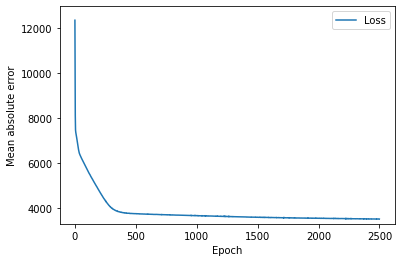


: Evaluate the new model against the test set:
9/9 [==============================] - 0s 3ms/step - loss: 3194.1250


3194.125

In [11]:
# The following variables are the hyperparameters.
learning_rate = 0.8
epochs = 2500
batch_size = 32
label_name = 'expenses'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, mae = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, mae)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)